In [1]:
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import gdal
import netCDF4 as nc

%run ../../COMMON/plot_and_table_functions.py

In [2]:
def create_file_reference( component_name ):
    '''
    This is a simple convenience function that will form a path and filename to a
    given water budget component
    '''
    # specify the prefix, path to SWB2 output, timeframe, and resolution
    output_path = '../output/'
    prefix      = 'maui_'
    start_year  = '2001'
    end_year    = '2002'
    ncol        = '316'
    nrow        = '210'
    return( output_path + prefix + component_name + '_' + start_year + '_' 
          + end_year + '__' + nrow + '_by_' + ncol + '.nc' )

In [3]:
net_infil = nc.Dataset( create_file_reference( 'net_infiltration') )

if net_infil is None:
    print('Could not open SWB 2.0 NetCDF grid file')
    sys.exit(1)

In [6]:
net_infil_vals_nc = net_infil.variables[ 'net_infiltration' ]
x_vals_nc = net_infil.variables[ 'x' ]
y_vals_nc = net_infil.variables[ 'y' ]

# create Numpy versions of the data to do actual work
net_infil_vals = ma.masked_where( np.isnan( net_infil_vals_nc ), net_infil_vals_nc ) 
x_vals = np.array( x_vals_nc )
y_vals = np.array( y_vals_nc )

In [7]:
# add up the grids for all 731 days in the simulation; divide by the number of years in the
# simulation to obtain the net infiltration sums on a mean annual basis
net_infil_sum = net_infil_vals.sum(axis=0) / 2.0

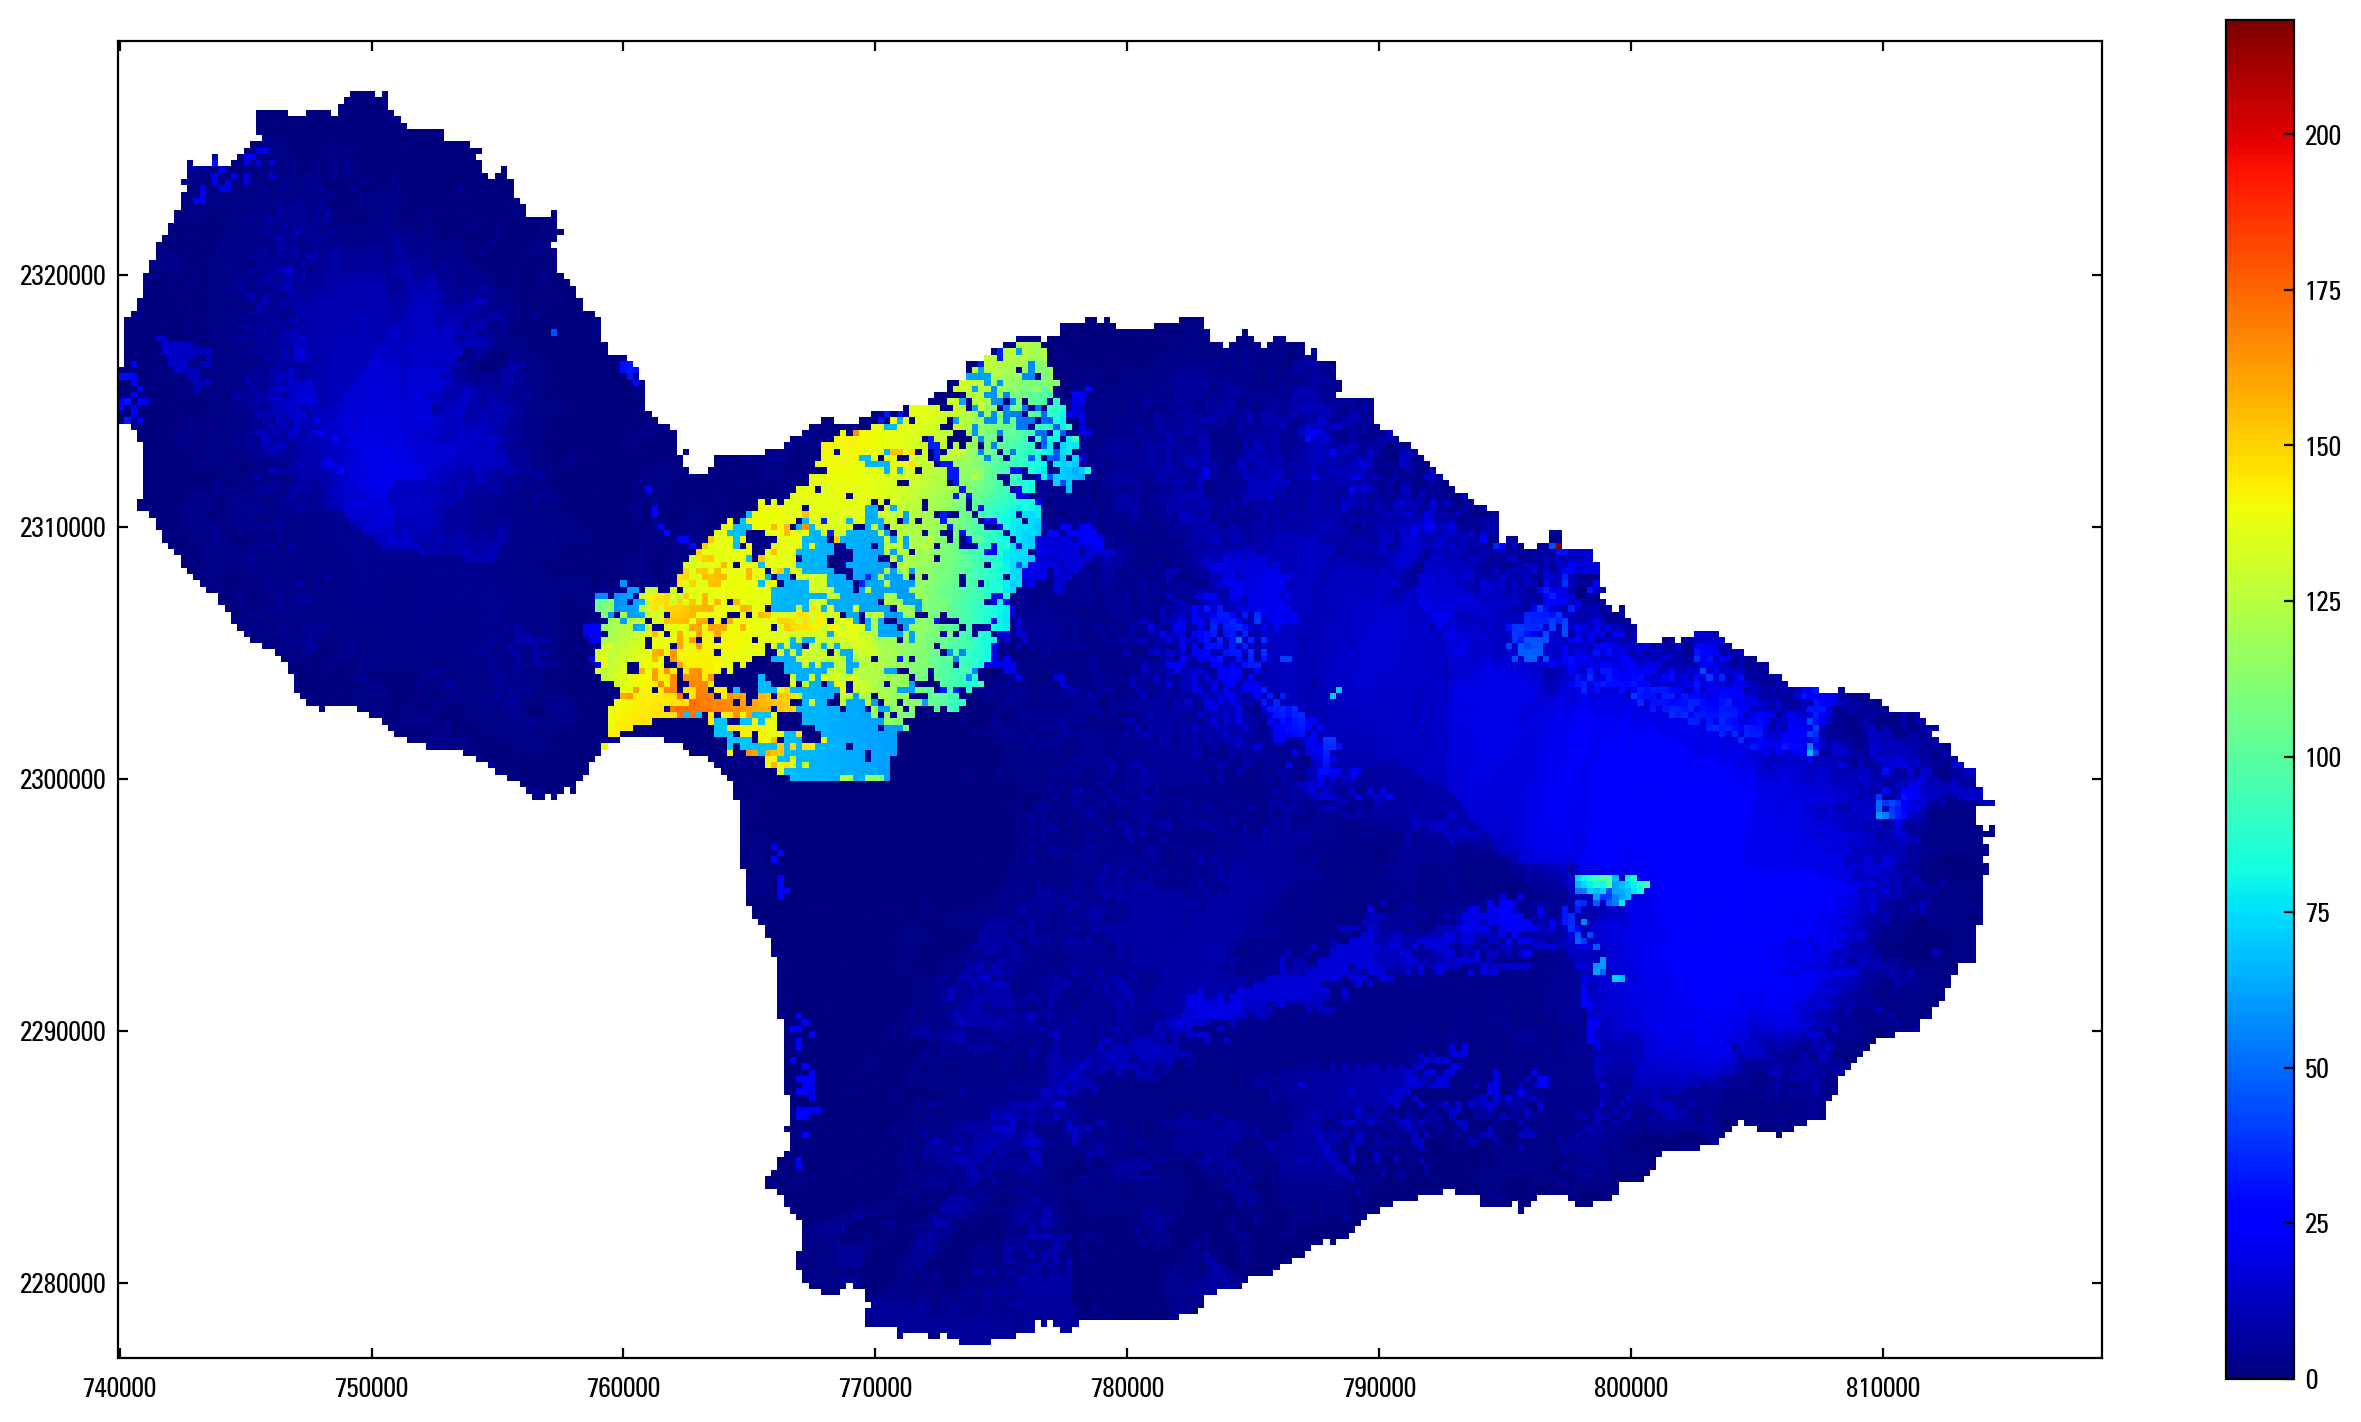

In [9]:
make_plot( x=x_vals, y=y_vals, var=net_infil_sum )